In [1]:
pip install pandas matplotlib seaborn scikit-learn joblib


Note: you may need to restart the kernel to use updated packages.


Nettoyage du fichier csv

In [2]:
import pandas as pd
from IPython.display import display

file_path = 'netflix titles.csv'

df = pd.read_csv(file_path)

print("Colonnes disponibles :", df.columns)
display(df.head())


Colonnes disponibles : Index(['show_id', 'type', 'title', 'director', 'cast', 'country', 'date_added',
       'release_year', 'rating', 'duration', 'listed_in', 'description'],
      dtype='object')


,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...


C:\Users\alexc\AppData\Local\Temp\ipykernel_7260\3474751306.py:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cleaned['date_added'] = pd.to_datetime(df_cleaned['date_added'], errors='coerce')
C:\Users\alexc\AppData\Local\Temp\ipykernel_7260\3474751306.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cleaned['year_added'] = df_cleaned['date_added'].dt.year


,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,year_added
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,2021-09-25,2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm...",2021
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,2021-09-24,2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t...",2021
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,2021-09-24,2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...,2021
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,2021-09-24,2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo...",2021
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,2021-09-24,2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...,2021


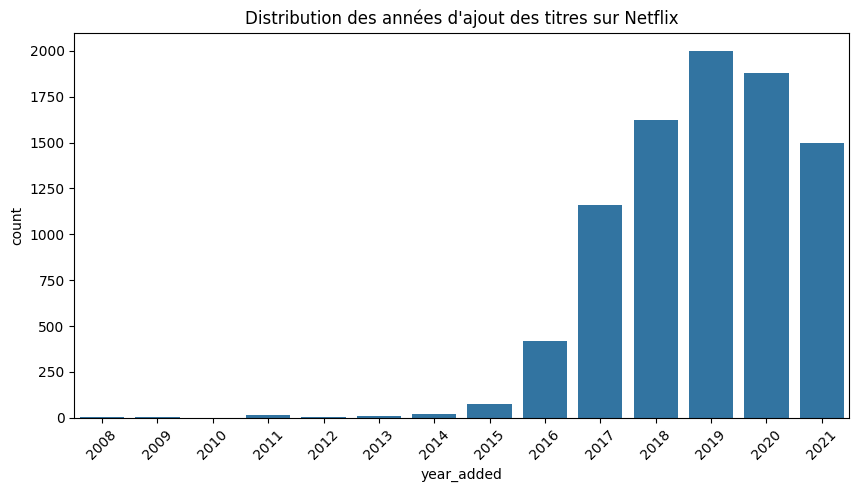

In [4]:
import pandas as pd
import numpy as np
from IPython.display import display
import matplotlib.pyplot as plt
import seaborn as sns
import joblib

file_path = 'netflix titles.csv'

try:
    df = pd.read_csv(file_path)
except Exception as e:
    print(f"Erreur lors de la lecture du fichier: {e}")
    df = pd.DataFrame()  

if not df.empty:
    df_cleaned = df.dropna(subset=['title', 'type', 'rating', 'date_added', 'listed_in'])
    df_cleaned['date_added'] = pd.to_datetime(df_cleaned['date_added'], errors='coerce')
    df_cleaned['year_added'] = df_cleaned['date_added'].dt.year

    df_cleaned = df_cleaned.dropna(subset=['year_added'])  
    df_cleaned['year_added'] = df_cleaned['year_added'].astype(int)  

   
    current_year = pd.Timestamp('now').year
    df_cleaned = df_cleaned[df_cleaned['year_added'].between(2000, current_year)] 

  
    display(df_cleaned.head())


    plt.figure(figsize=(10, 5))
    sns.countplot(x='year_added', data=df_cleaned)
    plt.title('Distribution des années d\'ajout des titres sur Netflix')
    plt.xticks(rotation=45)
    plt.show()
else:
    print("Le DataFrame est vide.")


Nous chargeons les données depuis 'netflix titles.csv', en exploitant des colonnes comme 'title', 'description', et 'duration' pour extraire des caractéristique textuelles et numériques. Les modèles  sont ensuite entraînés sur ces caractéristiques pour prédire l'appréciation et la rentabilité des contenus.

In [10]:
import requests
import pandas as pd

file_path = 'netflix titles.csv'

try:
    df = pd.read_csv(file_path, encoding='utf-8')
except UnicodeDecodeError:
    df = pd.read_csv(file_path, encoding='latin1')

print("Colonnes disponibles :", df.columns)

try:
    response = requests.post("http://127.0.0.1:8000/training", json={"file_path": file_path})

    if response.status_code == 200:
        print("Réponse de l'API :", response.json())
    else:
        print("Erreur lors de l'entraînement du modèle:", response.text)
except requests.exceptions.RequestException as e:
    print("Erreur de connexion :", e)


Colonnes disponibles : Index(['show_id', 'type', 'title', 'director', 'cast', 'country', 'date_added',
       'release_year', 'rating', 'duration', 'listed_in', 'description'],
      dtype='object')
Réponse de l'API : {'message': 'Modèles de classification entraînés avec succès'}


In [7]:
generate_data = {
    "prompt": "Once upon a time",
    "max_length": 50
}

response = requests.post("http://127.0.0.1:8000/generate", json=generate_data)

if response.status_code == 200:
    print("Texte généré :", response.json())
else:
    print("Erreur lors de la génération de texte :", response.text)


Texte généré : {'generated_text': 'Once upon a time, the people who had their way, and the men who were the greatest and strongest, were the ones who spoke on behalf of the people, and their opinions were the greatest and best of men. In that there was no law'}


In [9]:
predict_title = {
    "title": "Once upon a time"
}

response = requests.post("http://127.0.0.1:8000/predict", json=predict_title)

if response.status_code == 200:
    print("Prédiction d'appréciation et de rentabilité :", response.json())
else:
    print("Erreur lors de la prédiction d'appréciation et de rentabilité :", response.text)


Prédiction d'appréciation et de rentabilité : {'title': 'Once upon a time', 'appreciation_probability': '40.69%', 'rentability_probability': '71.29%'}


In [29]:
import requests
import pandas as pd

year = 2020
response = requests.get(f"http://127.0.0.1:8000/top10/appreciated?year={year}")

if response.status_code == 200:
    result = response.json()
    top_10_appreciated = pd.DataFrame(result['top_10_appreciated'])
    top_10_profitable = pd.DataFrame(result['top_10_profitable'])

    print(f"Top 10 films et séries TV les plus appréciés pour l'année {year} :")
    display(top_10_appreciated)
    
    print(f"\nTop 10 films et séries TV les plus rentables pour l'année {year} :")
    display(top_10_profitable)
else:
    print(f"Erreur lors de la récupération des top 10 appréciés et rentables pour l'année {year}:", response.text)


Top 10 films et séries TV les plus appréciés pour l'année 2020 :


,title,listed_in,release_year,appreciation_score
0,Rogue Warfare: Death of a Nation,Action & Adventure,2020,80.98%
1,Hard Kill,Action & Adventure,2020,79.49%
2,Sex Education,"British TV Shows, International TV Shows, TV C...",2020,77.10%
3,The Stand at Paxton County,"Dramas, Independent Movies, Thrillers",2020,77.05%
4,13 Reasons Why,"Crime TV Shows, TV Dramas, TV Mysteries",2020,75.87%
5,Death of Me,Horror Movies,2020,75.23%
6,The Witcher: A Look Inside the Episodes,"Docuseries, TV Sci-Fi & Fantasy",2020,74.94%
7,Blood of Zeus,Anime Series,2020,74.50%
8,Jack Whitehall: I'm Only Joking,Stand-Up Comedy,2020,72.96%
9,Oktoberfest: Beer & Blood,"International TV Shows, TV Dramas",2020,72.96%



Top 10 films et séries TV les plus rentables pour l'année 2020 :


,title,listed_in,release_year,rentability_score
0,The Midnight Sky,Dramas,2020,77.22%
1,Leslie Jones: Time Machine,Stand-Up Comedy,2020,75.39%
2,Dragonheart: Vengeance,"Action & Adventure, Sci-Fi & Fantasy",2020,75.07%
3,Sleepless Society: Two Pillows & A Lost Soul,"Crime TV Shows, International TV Shows, TV Dramas",2020,74.71%
4,Girl's Revenge,"Dramas, International Movies",2020,74.32%
5,Blood of Zeus,Anime Series,2020,71.90%
6,Horse Girl,"Dramas, Independent Movies",2020,71.61%
7,Young Wallander,"Crime TV Shows, International TV Shows, TV Dramas",2020,70.61%
8,The Shadow of Violence,Dramas,2020,70.43%
9,The Mystic River,"International TV Shows, TV Horror, TV Sci-Fi &...",2020,70.38%


In [10]:
model_appreciation = joblib.load("model/model_appreciation.pkl")
model_rentability = joblib.load("model/model_rentability.pkl")

df_cleaned['appreciation_score'] = df_cleaned['title'].apply(lambda x: round(model_appreciation.predict_proba([x])[0][1] * 100, 2))
df_cleaned['rentability_score'] = df_cleaned['title'].apply(lambda x: round(model_rentability.predict_proba([x])[0][1] * 100, 2))

display(df_cleaned.head())


,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,year_added,appreciation_score,rentability_score
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,2021-09-25,2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm...",2021.0,65.36,38.94
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,2021-09-24,2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t...",2021.0,65.30,73.94
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,2021-09-24,2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...,2021.0,57.76,58.97
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,2021-09-24,2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo...",2021.0,59.17,33.15
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,2021-09-24,2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...,2021.0,46.61,36.55
